# Classical classifiers

This notebook shows how well classical classifiers solve the sentence classification problem. This is mainly needed to have a baseline for quantum solution to compare against.

We first load our library files and the required packages.

In [1]:
import sys
import os
import json
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

sys.path.append("../../models/classical/")

from NNClassifier import (loadData,evaluate, NNClassifier,
       prepareTrainTestDevXYWords, prepareTrainTestDevXYSentence,)

We have implemented sentence vectorization using pretrained BERT cased and uncased (see [Git](https://github.com/google-research/bert), [arXiv](https://arxiv.org/abs/1810.04805)) base models (each sentence is represented as a 768-dimensional real-valued vector), sentence transformer models *all-mpnet-base-v2* and *all-distilroberta-v1* (see [link](https://www.sbert.net/docs/pretrained_models.html)) as well as word-level vectorization using [_fastText_](https://fasttext.cc/) model pretrained on [English Wikipedia and Common Crawl](hhttps://fasttext.cc/docs/en/crawl-vectors.html) (each word in a sentence is represented as a 300-dimensional real-valued vector).

The Jupyter notebook *Prepare_datasets_4classifier.ipynb* shows how to filterdata and acquire embedding vectors using different vectorization models.

In [2]:
datadir = "../../data/datasets"
dsName='labelled_newscatcher_dataset'

In [3]:
modeldir="../../models/classical"

## 1. Training shallow feedforward neural network

To train shallow feedforward neural network models we employ sentence level embeddings. 

In [4]:
embName='BERT_CASED'

In [5]:
data = loadData(f"{datadir}/{dsName}_{embName}.json")
print(f"Training samples: {len(data['train_data'])}, test samples: {len(data['test_data'])}, dev samples: {len(data['dev_data'])}")
print(f"An example sentence: {data['train_data'][2]['sentence']}, class: {data['train_data'][2]['class']}, syntactical tag: {data['train_data'][2]['tag']}")
print(f"Vectorized sentence dimension: {len(data['train_data'][0]['sentence_vectorized'][0])}")

Training samples: 142, test samples: 18, dev samples: 18
An example sentence: Leon Fleisher obituary, class: ENTERTAINMENT, syntactical tag: n[(n/n)   n[(n/n)   n]]
Vectorized sentence dimension: 768


We reformat the data as numpy arrays for classifier training. 

In [6]:
trainX, trainY, testX, testY, devX, devY = prepareTrainTestDevXYSentence(data,classify_by_field="class")
print(f"{trainX.shape}")
print(f"{trainY.shape}")
print(f"{testX.shape}")
print(f"{testY.shape}")
print(f"{devX.shape}")
print(f"{devY.shape}")

(142, 768)
(142, 8)
(18, 768)
(18, 8)
(18, 768)
(18, 8)


Now we train a feedforward neural network classifier.

In [7]:
print(devX)

[[ 0.24831168  0.07755949  0.18315697 ... -0.17061237  0.47798586
   0.42581174]
 [ 0.46027943 -0.00449959  0.24570152 ... -0.38116983  0.57670146
   0.08010881]
 [ 0.50678337  0.28690478  0.11979629 ... -0.14566845  0.5664351
   0.00436824]
 ...
 [ 0.00952067 -0.19946343 -0.06688491 ...  0.18058451  0.13292444
  -0.09864058]
 [ 0.38189271  0.11512726 -0.54941505 ... -0.30580053  0.38593382
   0.12605624]
 [ 0.15197268 -0.06892152  0.01059069 ...  0.21744832  0.52277052
  -0.13285317]]


In [8]:
print(testX)

[[ 0.17508845  0.0303731  -0.11608101 ...  0.15217581  0.23186953
  -0.04536352]
 [ 0.21825086  0.01423122 -0.43340895 ... -0.11458683  0.41350371
   0.3508732 ]
 [ 0.25613171  0.4123975  -0.19751278 ... -0.24310029  0.45322585
   0.19729736]
 ...
 [ 0.32167602  0.2516858   0.0106113  ... -0.02072906  0.37319386
   0.18247254]
 [-0.13527533 -0.336319    0.10188356 ...  0.07672532  0.23597278
   0.02403479]
 [ 0.45947847 -0.05158372  0.02307672 ... -0.41138276  0.36236608
   0.33128804]]


In [9]:
print(devY)

[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [10]:
print(testY)

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [11]:
classifier = NNClassifier()
history = classifier.train(trainX, trainY, devX, devY)

Epoch 1/100
5/5 - 0s - loss: 2.3765 - accuracy: 0.1408 - val_loss: 2.1556 - val_accuracy: 0.1111 - 346ms/epoch - 69ms/step
Epoch 2/100
5/5 - 0s - loss: 1.9353 - accuracy: 0.2465 - val_loss: 1.9896 - val_accuracy: 0.2778 - 22ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 1.7737 - accuracy: 0.4085 - val_loss: 1.9350 - val_accuracy: 0.3333 - 20ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 1.7000 - accuracy: 0.3662 - val_loss: 1.9035 - val_accuracy: 0.3333 - 22ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 1.6134 - accuracy: 0.4296 - val_loss: 1.8506 - val_accuracy: 0.3333 - 19ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 1.5205 - accuracy: 0.5211 - val_loss: 1.7962 - val_accuracy: 0.3333 - 21ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 1.4544 - accuracy: 0.5563 - val_loss: 1.7425 - val_accuracy: 0.3333 - 20ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 1.3847 - accuracy: 0.5352 - val_loss: 1.6784 - val_accuracy: 0.3333 - 21ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 1

Epoch 69/100
5/5 - 0s - loss: 0.3019 - accuracy: 0.9930 - val_loss: 1.2241 - val_accuracy: 0.6111 - 22ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 0.2962 - accuracy: 0.9930 - val_loss: 1.2256 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 0.2905 - accuracy: 0.9930 - val_loss: 1.2258 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 0.2863 - accuracy: 0.9930 - val_loss: 1.2300 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 0.2809 - accuracy: 0.9930 - val_loss: 1.2289 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 0.2759 - accuracy: 0.9930 - val_loss: 1.2303 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 0.2706 - accuracy: 0.9930 - val_loss: 1.2189 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 0.2661 - accuracy: 0.9930 - val_loss: 1.2171 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - 

## 2. Evaluating shallow feedforward neural network

The *history* object returned by *train* function holds a record of the metric values during training.

In [12]:
nn_train_acc = history.history["accuracy"][-1]
print(f"FNN train accuracy on {embName} vectors: {nn_train_acc}")

FNN train accuracy on BERT_CASED vectors: 1.0


And measure the accuracy on the test set.

In [13]:
res = classifier.predict(testX)
nn_test_acc = evaluate(res, testY)
print(f"FFNN test accuracy on {embName} vectors: {nn_test_acc}")

1/1 [==============================] - 0s 46ms/step
FFNN test accuracy on BERT_CASED vectors: 0.7222222222222222


For comparison we employ the nierest neighbor algorithm on the same data. We calculate the accuracy of classifying the sentence with the label corresponding to the closest sentence in the training data.

In [14]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(trainX, trainY)
res = neigh.predict(testX)
neigh_test_acc = np.sum(res == testY)/len(testY[0])/len(testY)
neigh_train_acc = neigh.score(trainX, trainY)
print(f"Nearest neighbor test accuracy: {neigh_test_acc}, train accuracy: {neigh_train_acc}")

Nearest neighbor test accuracy: 0.9027777777777778, train accuracy: 1.0


Depending on random, the FNN classifier might perform better or worse (or the same) than the 1-nearest neighbor algorithm.

## 3. Training convolutional neural network classifier

Now we load fastText word embeddings and train a convolutional network on them.

In [15]:
data = loadData(f"{datadir}/{dsName}_FASTTEXT.json")

maxLen = 6
trainX, trainY, testX, testY, devX, devY = prepareTrainTestDevXYWords(data, maxLen,classify_by_field="class")

cnnclassifier = NNClassifier(model="CNN", vectorSpaceSize=300)
history = cnnclassifier.train(trainX, trainY, devX, devY)

Global Phospholipids Industry
August 4 coronavirus news
Leon Fleisher obituary
DraftKings Preview : Wyndham Championship
Market Minute with Mary Weichert
Global Gas Engines Industry
The Caribbean Dilemma
MartinLogan Motion 60XTi review
Samsung Galaxy Watch3 Review
Earnings Outlook For Walt Disney
Global Antimicrobial Additives Industry
Fantasy Insider : Wyndham Championship
NY Current Conditions
Two dead in Westville shooting
Party official in land scam
Audi developing dynamics superbrain
The Super Mario Effect
Stellar egg hunt
Possible challenge of COVID-19 vaccination
MSI Optix MAG161V Review
Crucial P5 Review
Global Booster Compressors Industry
Razer Cynosa V2 Review
Unjust jail reform
Lenovo ThinkStation P520 Review
The Zulum testimonies
Spanish GP driver ratings
WTA Race Standings
August 7 coronavirus news
Sony WH-1000XM4 review
COVID-19 outbreak in Middle East
Mars race rhetoric
Daimler settlement over diesel emissions
MSI Optix MAG321CURV Review
Cooler Weather for the Weekend
Sa

Epoch 27/30
5/5 - 0s - loss: 0.1726 - accuracy: 0.9930 - val_loss: 2.0785 - val_accuracy: 0.5000 - 28ms/epoch - 6ms/step
Epoch 28/30
5/5 - 0s - loss: 0.1534 - accuracy: 0.9930 - val_loss: 2.0878 - val_accuracy: 0.5000 - 27ms/epoch - 5ms/step
Epoch 29/30
5/5 - 0s - loss: 0.1545 - accuracy: 0.9930 - val_loss: 2.1114 - val_accuracy: 0.5000 - 29ms/epoch - 6ms/step
Epoch 30/30
5/5 - 0s - loss: 0.1417 - accuracy: 0.9930 - val_loss: 2.1476 - val_accuracy: 0.5000 - 27ms/epoch - 5ms/step


## 4. Evaluating convolutional neural network classifier

In [16]:
fasttext_nn_train_acc = history.history['accuracy'][-1]
print(f"CNN train accuracy on fastText vectors: {fasttext_nn_train_acc}")

CNN train accuracy on fastText vectors: 0.9929577708244324


In [17]:
res = cnnclassifier.predict(testX)
fasttext_nn_test_acc = evaluate(res, testY)
print(f"CNN test accuracy on fastText vectors: {fasttext_nn_test_acc}")

1/1 [==============================] - 0s 51ms/step
CNN test accuracy on fastText vectors: 0.6111111111111112


## 5. Comparing results

Now we will show results (train and test accuracies) in a chart.

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
test_accs = [fasttext_nn_test_acc, neigh_test_acc, nn_test_acc]
train_accs = [fasttext_nn_train_acc, neigh_train_acc, nn_train_acc]
labels = ["fastText CNN",f"{embName} nearest neighbors", f"{embName} NN"]

To compare results we will train models for other sentence embeddings as well.

In [19]:
for currEmb in ['BERT_UNCASED', 'all-distilroberta', 'all-mpnet-base']:
    data = loadData(f"{datadir}/{dsName}_{currEmb}.json")
    trainX, trainY, testX, testY, devX, devY = prepareTrainTestDevXYSentence(data,classify_by_field="class")

    currclassifier = NNClassifier()
    history = currclassifier.train(trainX, trainY, devX, devY)

    labels.append(f"{currEmb} NN")
    curr_train_acc = history.history["accuracy"][-1]
    train_accs.append(curr_train_acc)
    
    res = currclassifier.predict(testX)
    curr_test_acc = evaluate(res, testY)
    test_accs.append(curr_test_acc)

Epoch 1/100
5/5 - 0s - loss: 2.3440 - accuracy: 0.1268 - val_loss: 1.9942 - val_accuracy: 0.2778 - 285ms/epoch - 57ms/step
Epoch 2/100
5/5 - 0s - loss: 1.8830 - accuracy: 0.3169 - val_loss: 1.8845 - val_accuracy: 0.2778 - 21ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 1.7328 - accuracy: 0.3451 - val_loss: 1.8274 - val_accuracy: 0.3333 - 21ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 1.6255 - accuracy: 0.4366 - val_loss: 1.7789 - val_accuracy: 0.3889 - 22ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 1.5201 - accuracy: 0.5000 - val_loss: 1.7101 - val_accuracy: 0.3889 - 21ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 1.4178 - accuracy: 0.5493 - val_loss: 1.6475 - val_accuracy: 0.4444 - 22ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 1.3383 - accuracy: 0.5986 - val_loss: 1.5997 - val_accuracy: 0.4444 - 20ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 1.2681 - accuracy: 0.6268 - val_loss: 1.5683 - val_accuracy: 0.5000 - 20ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 1

Epoch 69/100
5/5 - 0s - loss: 0.2533 - accuracy: 0.9718 - val_loss: 1.2133 - val_accuracy: 0.4444 - 19ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 0.2482 - accuracy: 0.9718 - val_loss: 1.2084 - val_accuracy: 0.4444 - 19ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 0.2447 - accuracy: 0.9718 - val_loss: 1.2099 - val_accuracy: 0.4444 - 20ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 0.2398 - accuracy: 0.9789 - val_loss: 1.2046 - val_accuracy: 0.4444 - 19ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 0.2363 - accuracy: 0.9789 - val_loss: 1.2102 - val_accuracy: 0.4444 - 19ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 0.2320 - accuracy: 0.9789 - val_loss: 1.2127 - val_accuracy: 0.4444 - 19ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 0.2287 - accuracy: 0.9789 - val_loss: 1.2185 - val_accuracy: 0.4444 - 19ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 0.2239 - accuracy: 0.9789 - val_loss: 1.2210 - val_accuracy: 0.4444 - 19ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - 

Epoch 36/100
5/5 - 0s - loss: 1.2859 - accuracy: 0.8028 - val_loss: 1.5341 - val_accuracy: 0.6111 - 18ms/epoch - 4ms/step
Epoch 37/100
5/5 - 0s - loss: 1.2708 - accuracy: 0.8099 - val_loss: 1.5249 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 38/100
5/5 - 0s - loss: 1.2557 - accuracy: 0.8099 - val_loss: 1.5160 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 39/100
5/5 - 0s - loss: 1.2411 - accuracy: 0.8169 - val_loss: 1.5074 - val_accuracy: 0.6111 - 20ms/epoch - 4ms/step
Epoch 40/100
5/5 - 0s - loss: 1.2268 - accuracy: 0.8239 - val_loss: 1.4989 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 41/100
5/5 - 0s - loss: 1.2128 - accuracy: 0.8239 - val_loss: 1.4905 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 42/100
5/5 - 0s - loss: 1.1992 - accuracy: 0.8239 - val_loss: 1.4822 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 43/100
5/5 - 0s - loss: 1.1855 - accuracy: 0.8239 - val_loss: 1.4741 - val_accuracy: 0.6111 - 19ms/epoch - 4ms/step
Epoch 44/100
5/5 - 0s - 

Epoch 3/100
5/5 - 0s - loss: 2.0092 - accuracy: 0.5634 - val_loss: 2.0202 - val_accuracy: 0.4444 - 19ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 1.9785 - accuracy: 0.6338 - val_loss: 2.0028 - val_accuracy: 0.4444 - 20ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 1.9489 - accuracy: 0.7042 - val_loss: 1.9852 - val_accuracy: 0.5000 - 20ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 1.9191 - accuracy: 0.7254 - val_loss: 1.9685 - val_accuracy: 0.5000 - 20ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 1.8899 - accuracy: 0.7324 - val_loss: 1.9525 - val_accuracy: 0.5556 - 19ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 1.8627 - accuracy: 0.7465 - val_loss: 1.9360 - val_accuracy: 0.5556 - 19ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 1.8338 - accuracy: 0.7606 - val_loss: 1.9197 - val_accuracy: 0.5000 - 20ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 1.8066 - accuracy: 0.7676 - val_loss: 1.9038 - val_accuracy: 0.5000 - 19ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 1

Epoch 71/100
5/5 - 0s - loss: 0.8691 - accuracy: 0.8873 - val_loss: 1.4203 - val_accuracy: 0.5556 - 20ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 0.8608 - accuracy: 0.8944 - val_loss: 1.4172 - val_accuracy: 0.5556 - 19ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 0.8527 - accuracy: 0.8944 - val_loss: 1.4137 - val_accuracy: 0.5556 - 21ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 0.8446 - accuracy: 0.8944 - val_loss: 1.4105 - val_accuracy: 0.5556 - 19ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 0.8368 - accuracy: 0.8944 - val_loss: 1.4070 - val_accuracy: 0.5556 - 19ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 0.8290 - accuracy: 0.8944 - val_loss: 1.4039 - val_accuracy: 0.5556 - 17ms/epoch - 3ms/step
Epoch 77/100
5/5 - 0s - loss: 0.8213 - accuracy: 0.8944 - val_loss: 1.4010 - val_accuracy: 0.5556 - 18ms/epoch - 4ms/step
Epoch 78/100
5/5 - 0s - loss: 0.8136 - accuracy: 0.8944 - val_loss: 1.3980 - val_accuracy: 0.5556 - 21ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - 

All results are presented in the bar chart.

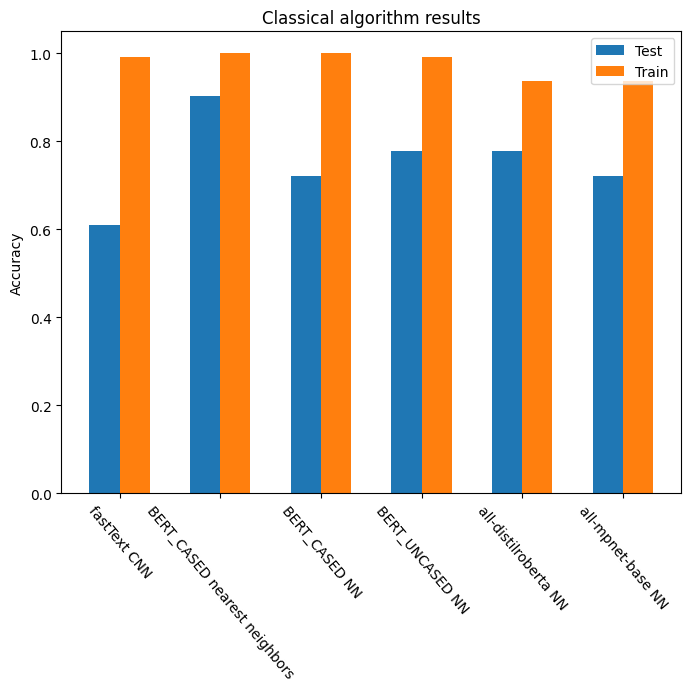

In [20]:
width = 0.3
plt.bar(np.arange(len(test_accs)) - (width/2), test_accs, width=width)
plt.bar(np.arange(len(train_accs)) + (width/2), train_accs, width=width)
plt.xticks(range(len(labels)), labels, rotation=-50)
plt.ylabel("Accuracy")
plt.title("Classical algorithm results")
plt.legend(["Test", "Train"])
plt.show()

All results are saved to file.

In [21]:
with open(f"{modeldir}/{dsName}_results.json", "w", encoding="utf-8") as f:
        json.dump({"train_accuracy": train_accs, "test_accuracy": test_accs, "model type": labels}, f, indent=1, ensure_ascii=False)

## 6. Saving, loading and re-using models

!!! To save the model use function save. The function's argument is the folder name where trained model's files will be saved.

In [22]:
classifier.save(f"{modeldir}/{dsName}_{embName}")

INFO:tensorflow:Assets written to: ../../models/classical/labelled_newscatcher_dataset_BERT_CASED\assets


!!! To load previousely saved model create *NNClassifier* object and use function *load*. The function's argument is the folder name where trained model's files are saved. In this example *newclassifier* object after loading will become replica of *classifier* object.

In [23]:
newclassifier = NNClassifier()
newclassifier.load(f"{modeldir}/{dsName}_{embName}")

True

!!! To use classifier for prediction:
1) generate embedding vector;
2) predict the class of the sentence calling function *predict* and passing embedding vector of the sentence.

In [24]:
sys.path.append("../../data/data_processing/data_vectorisation/")
from Embeddings import Embeddings
vc = Embeddings('bert-base-cased','bert')
sentence="global financial system"
embvec = vc.getEmbeddingVector(sentence)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


bert-base-cased loaded!


In [25]:
classpredicted = newclassifier.predict(embvec)
origclasspredicted = classifier.predict(embvec)
print(f"Sentence: {sentence}\nClass (original classifier): {origclasspredicted}\nClass (reloaded classifier): {classpredicted}")

1/1 [==============================] - 0s 23ms/step
Sentence: global financial system
Class (original classifier): [5]
Class (reloaded classifier): [5]
